In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/Users/annmaryanish/Downloads/diabetes.csv')  

# Preprocess the data
X = data.iloc[:, 1:].values  # Features
y = data.iloc[:, 0].values    # Labels

# Convert labels from 0, 1 to -1, 1 for the Perceptron implementation
y = np.where(y == 0, -1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training the Perceptron
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, -1)

                # Update rule
                if y[idx] != y_predicted:  # Check if the prediction is wrong
                    self.weights += self.lr * x_i * y[idx]
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

# Train and evaluate the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Make predictions
predictions = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 72.73%


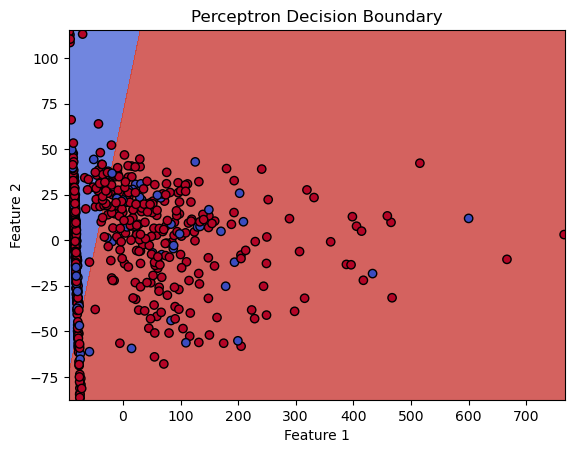

In [35]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid for the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the labels for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Apply PCA to reduce to 2 dimensions
if X.shape[1] > 2:  # If more than 2 features, reduce dimensions
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
else:
    X_train_pca = X_train
    X_test_pca = X_test

# Train the perceptron model on the reduced dimensions
perceptron.fit(X_train_pca, y_train)
predictions = perceptron.predict(X_test_pca)

# Plot decision boundary for the reduced feature set
plot_decision_boundary(X_train_pca, y_train, perceptron)